# Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_data_dir = "C:/Users/Grishma Antad/Downloads/Object Recognition/archive/Alzheimer_s Dataset/train"
test_data_dir = "C:/Users/Grishma Antad/Downloads/Object Recognition/archive/Alzheimer_s Dataset/test"

In [4]:
img_size = (224, 224)
batch_size = 32

# Data  Augmentation and Normalization

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare the training data

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5121 images belonging to 4 classes.


# Load pre-trained ResNet50 model

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Freeze the layers of the pre-trained model

In [8]:
for layer in base_model.layers:
    layer.trainable = False

# Building Custom model on top of ResNet50

In [9]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


# Compile the model

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
)

Epoch 1/10
160/160 [==============================] - 521s 3s/step - loss: 1.0889 - accuracy: 0.4769
Epoch 2/10
160/160 [==============================] - 465s 3s/step - loss: 1.0427 - accuracy: 0.4965
Epoch 3/10
160/160 [==============================] - 423s 3s/step - loss: 1.0326 - accuracy: 0.5003
Epoch 4/10
160/160 [==============================] - 450s 3s/step - loss: 1.0328 - accuracy: 0.4981
Epoch 5/10
160/160 [==============================] - 506s 3s/step - loss: 1.0305 - accuracy: 0.4991
Epoch 6/10
160/160 [==============================] - 509s 3s/step - loss: 1.0275 - accuracy: 0.4981
Epoch 7/10
160/160 [==============================] - 506s 3s/step - loss: 1.0278 - accuracy: 0.4993
Epoch 8/10
160/160 [==============================] - 505s 3s/step - loss: 1.0247 - accuracy: 0.4993
Epoch 9/10
160/160 [==============================] - 498s 3s/step - loss: 1.0203 - accuracy: 0.5025
Epoch 10/10
160/160 [==============================] - 444s 3s/step - loss: 1.0231 - accura

# Evaluating the Model

In [14]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')



Found 1279 images belonging to 4 classes.
40/40 [==============================] - 120s 3s/step - loss: 1.0295 - accuracy: 0.5004
Test accuracy: 0.5003909468650818


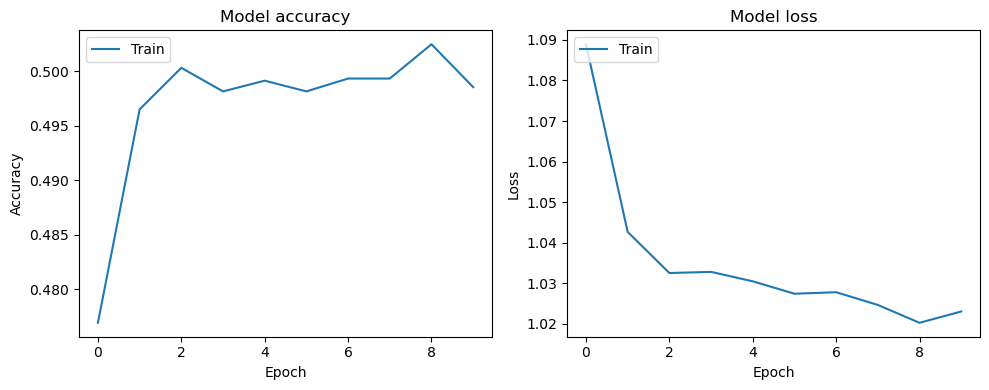

In [17]:
def plot_history(history):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)